In [2]:
!pip install tensorflow==2.12.0


Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install mediapipe


Defaulting to user installation because normal site-packages is not writeable


In [6]:
!pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable


In [7]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [8]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [9]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [10]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [11]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [12]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
       
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [13]:
len(results.pose_landmarks.landmark)

33

In [14]:
results

mediapipe.python.solution_base.SolutionOutputs

In [15]:
draw_landmarks(frame,results)

In [16]:
print('Hola')

Hola


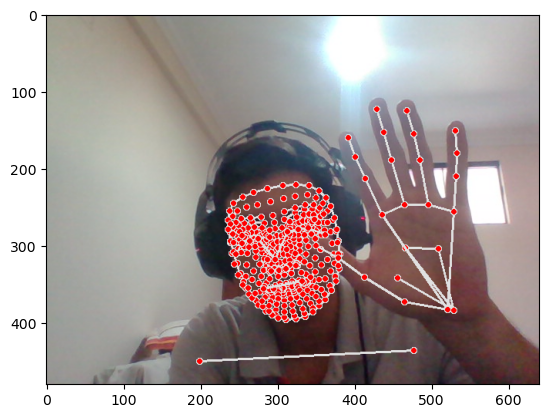

In [17]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [18]:
results.face_landmarks

landmark {
  x: 0.48676726
  y: 0.7271818
  z: -0.023870254
}
landmark {
  x: 0.47726944
  y: 0.6854804
  z: -0.05137808
}
landmark {
  x: 0.48153657
  y: 0.6961862
  z: -0.025838794
}
landmark {
  x: 0.4631281
  y: 0.6368868
  z: -0.03977216
}
landmark {
  x: 0.47472316
  y: 0.6709167
  z: -0.055311486
}
landmark {
  x: 0.47223327
  y: 0.65032303
  z: -0.05237114
}
landmark {
  x: 0.46727535
  y: 0.5991234
  z: -0.02880862
}
landmark {
  x: 0.4046318
  y: 0.6069005
  z: 0.016354913
}
landmark {
  x: 0.46283928
  y: 0.56360924
  z: -0.023783827
}
landmark {
  x: 0.45993757
  y: 0.5448891
  z: -0.02680986
}
landmark {
  x: 0.44974196
  y: 0.4722495
  z: -0.019955575
}
landmark {
  x: 0.4879975
  y: 0.7339351
  z: -0.022001894
}
landmark {
  x: 0.48915327
  y: 0.738377
  z: -0.018370278
}
landmark {
  x: 0.48991886
  y: 0.7394192
  z: -0.013860652
}
landmark {
  x: 0.4896461
  y: 0.73870265
  z: -0.013165254
}
landmark {
  x: 0.49034175
  y: 0.74414414
  z: -0.014648957
}
landmark {
  x:

In [19]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [20]:
pose

[array([ 0.46425143,  0.66410708, -0.82605398,  0.99997324]),
 array([ 0.48999143,  0.58916277, -0.77694625,  0.99995571]),
 array([ 0.51122636,  0.58268547, -0.77641666,  0.999964  ]),
 array([ 0.531452  ,  0.57792038, -0.77617872,  0.9999615 ]),
 array([ 0.43045574,  0.6068207 , -0.76117927,  0.99994522]),
 array([ 0.41317019,  0.61257303, -0.75985491,  0.99993593]),
 array([ 0.39721718,  0.61973375, -0.7598263 ,  0.99991471]),
 array([ 0.56664479,  0.59778821, -0.43994713,  0.99997091]),
 array([ 0.38497624,  0.64944112, -0.33706403,  0.99994957]),
 array([ 0.51888639,  0.72262824, -0.69732666,  0.99996877]),
 array([ 0.44158167,  0.74192238, -0.66868055,  0.99994826]),
 array([ 0.74616683,  0.90952516, -0.2446849 ,  0.99935186]),
 array([ 0.31221491,  0.93854159, -0.06016202,  0.99572688]),
 array([ 1.08043122,  1.15415955, -0.7823053 ,  0.84487855]),
 array([0.21414903, 1.36772168, 0.12516227, 0.08690833]),
 array([ 0.82665873,  0.80107099, -1.21239448,  0.95355153]),
 array([ 0.1

In [21]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3) 

In [22]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [23]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [24]:
extract_keypoints(results).shape

(1662,)

In [28]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['Hola', 'Chau', 'Permiso'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [26]:
actions

array(['Hola', 'Chau', 'iloveyou'], dtype='<U8')

In [29]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [31]:
#Collect Keypoint Values for Training and Testing

In [30]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [31]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [32]:
label_map = {label:num for num, label in enumerate(actions)}

In [33]:
label_map

{'Hola': 0, 'Chau': 1, 'Permiso': 2}

In [34]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [35]:
np.array(sequences).shape

(90, 30, 1662)

In [36]:
np.array(labels).shape

(90,)

In [37]:
X = np.array(sequences)

In [38]:
X.shape

(90, 30, 1662)

In [39]:
y = to_categorical(labels).astype(int)

In [40]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [42]:
y_test.shape

(5, 3)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [49]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [57]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [45]:
res = [.7, 0.2, 0.1]

In [46]:
actions[np.argmax(res)]

'Hola'

In [58]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
# Detenganse aqui una vez corran la siguiente linea 

In [50]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 7s 84ms/step - loss: 7.6028 - categorical_accuracy: 0.3059
Epoch 2/2000
3/3 [==============================] - 0s 77ms/step - loss: 164.4074 - categorical_accuracy: 0.2941
Epoch 3/2000
3/3 [==============================] - 0s 76ms/step - loss: 321.8599 - categorical_accuracy: 0.3059
Epoch 4/2000
3/3 [==============================] - 0s 76ms/step - loss: 174.7160 - categorical_accuracy: 0.2824
Epoch 5/2000
3/3 [==============================] - 0s 76ms/step - loss: 81.6845 - categorical_accuracy: 0.4000
Epoch 6/2000
3/3 [==============================] - 0s 76ms/step - loss: 110.9357 - categorical_accuracy: 0.2824
Epoch 7/2000
3/3 [==============================] - 0s 80ms/step - loss: 47.9631 - categorical_accuracy: 0.4353
Epoch 8/2000
3/3 [==============================] - 0s 75ms/step - loss: 48.2459 - categorical_accuracy: 0.3882
Epoch 9/2000
3/3 [==============================] - 0s 83ms/step - loss: 35.8232 - categorical_accura

KeyboardInterrupt: 

In [ ]:
#vayan al cmmodel.summary()d a la carpeta del proyecto y entren a logs , ingresen el siguiente comando = > tensorboard --logdir=. model.summary()

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

In [52]:
res = model.predict(X_test)

1/1 [==============================] - 1s 562ms/step


In [53]:
actions[np.argmax(res[4])]

'Permiso'

In [54]:
actions[np.argmax(y_test[4])]

'Permiso'

In [55]:
model.save('action.h5')

In [56]:
del model

In [59]:
model.load_weights('action.h5')